In [1]:
# required libraries
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [2]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

In [21]:
# Find the markers on the body
def find_markers(img):
    with mp_pose.Pose(static_image_mode=True) as pose:
        """
        This function utilizes the MediaPipe library to detect and draw 'landmarks'
        (reference points) on an image. 'Landmarks' are points of interest
        that represent various body parts detected in the image.
        Args:
            static_image_mode: a boolean to inform if the image is static (True) or sequential (False).
        """
        # Make a copy of the original image.
        annotated_img = img.copy()
        # Processes the image.
        results = pose.process(annotated_img)
        # Set the circle radius for drawing the 'landmarks'.
    
    return results

def get_coords(results, landmark, img_width, img_height):
    if results.pose_landmarks is not None:
        x = int(results.pose_landmarks.landmark[landmark].x*img_width)
        y = int(results.pose_landmarks.landmark[landmark].y*img_height)
        z = int(results.pose_landmarks.landmark[landmark].z*img_width)
    
        return [x, y, z]
    else:
        return[0, 0, 0]

def draw_plot(pose_matrix, fig, sc):
    if pose_matrix is not None:
        sc._offsets3d = (pose_matrix[:, 0], pose_matrix[:, 1], pose_matrix[:, 2])
        fig.canvas.draw()
        fig.canvas.flush_events()

        return sc
    
def initialize_plot(pose_matrix, scatter, ax, fig):
    if scatter == False and pose_matrix is not None:
        scatter = True
        sc = ax.scatter(pose_matrix[0:,0], pose_matrix[0:,1], pose_matrix[0:,2])
        fig.show()

        return scatter, sc, fig


# results = find_markers(img) #RUN RESULTS

# # ALL THE COORDINATES 
# l_elbow = get_coords(results, mp_pose.PoseLandmark.LEFT_ELBOW, img_width, img_height)
# r_elbow= get_coords(results, mp_pose.PoseLandmark.RIGHT_ELBOW, img_width, img_height)
# l_shoulder = get_coords(results, mp_pose.PoseLandmark.LEFT_SHOULDER, img_width, img_height)
# r_shoulder = get_coords(results, mp_pose.PoseLandmark.RIGHT_SHOULDER, img_width, img_height)
# l_hip = get_coords(results, mp_pose.PoseLandmark.LEFT_HIP, img_width, img_height)
# r_hip = get_coords(results, mp_pose.PoseLandmark.RIGHT_HIP, img_width, img_height)
# pose_matrix = np.array([l_elbow, r_elbow, l_shoulder, r_shoulder, l_hip, r_hip])


# plt.show()



              

C:\Users\MIMS_VR2\AppData\Local\Temp\ipykernel_22552\2078020523.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


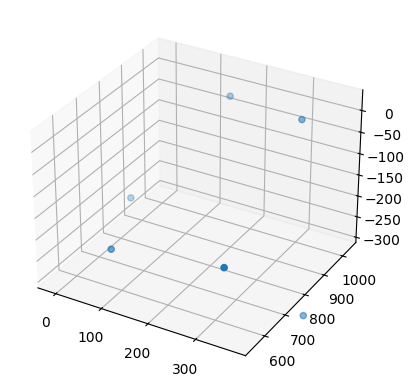

In [22]:
# define a video capture object 
cap = cv2.VideoCapture(0) 
cap.set(3,800)
cap.set(4,800)

# Img data
img_width = 800
img_height = 800

# Initialize Graph
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = False

while(True): 
      
    ret, frame = cap.read() # Reads the frame

    results = find_markers(frame) # GET DETECTIONS

    # PARSE COORDINATES
    l_elbow = get_coords(results, mp_pose.PoseLandmark.LEFT_ELBOW, img_width, img_height)
    r_elbow= get_coords(results, mp_pose.PoseLandmark.RIGHT_ELBOW, img_width, img_height)
    l_shoulder = get_coords(results, mp_pose.PoseLandmark.LEFT_SHOULDER, img_width, img_height)
    r_shoulder = get_coords(results, mp_pose.PoseLandmark.RIGHT_SHOULDER, img_width, img_height)
    l_hip = get_coords(results, mp_pose.PoseLandmark.LEFT_HIP, img_width, img_height)
    r_hip = get_coords(results, mp_pose.PoseLandmark.RIGHT_HIP, img_width, img_height)
    pose_matrix = np.array([l_elbow, r_elbow, l_shoulder, r_shoulder, l_hip, r_hip])
    
    # UPDATE PLOT
    if scatter == False:
        scatter, sc, fig = initialize_plot(pose_matrix, scatter, ax, fig)
    else:
        sc = draw_plot(pose_matrix, fig, sc)
  
    #Display live video feed
    cv2.imshow('frame', frame)
    
    # the 'q' button is set as the 
    # quitting button you may use any 
    # desired button of your choice 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
# After the loop release theq cap object 
cap.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 

#####Need to apply MP to live video, need to corelate xyz points for live plot

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

X = np.random.rand(100, 3)*10
Y = np.random.rand(100, 3)*5

plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2])
fig.show()

for i in range(0, 20):
    plt.pause(1)

    Y = np.random.rand(100, 3)*5

    sc._offsets3d = (Y[:,0], Y[:,1], Y[:,2])
    plt.draw()

TypeError: 'bool' object is not callable

In [23]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# For static images:
IMAGE_FILES = []
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
    )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image)

    # Draw the pose annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

: 